In [81]:
import optuna
from optuna.samplers import RandomSampler
import matplotlib.pyplot as plt

optuna.logging.set_verbosity(optuna.logging.WARNING)

In [85]:
def objective(trial, low_val, high_val, log=False):
    
    lr = trial.suggest_float("learning_rate", low_val, high_val, log=log)
    return lr



In [86]:
low_val = 0.0001
high_val = 1
n_trials = 1000

In [87]:
study = optuna.create_study(sampler=RandomSampler())
objective_linear = lambda trial: objective(trial, low_val, high_val, log=False)
study.optimize(objective_linear, n_trials=n_trials)
df_optuna_linear = study.trials_dataframe()

study = optuna.create_study(sampler=RandomSampler())
objective_logarithmic = lambda trial: objective(trial, low_val, high_val, log=True)
study.optimize(objective_logarithmic, n_trials=n_trials)
df_optuna_logarithmic = study.trials_dataframe()

In [88]:
df_optuna_linear.describe()

,number,value,duration,params_learning_rate
count,1000.000000,1000.000000,1000,1000.000000
mean,499.500000,0.492080,0 days 00:00:00.000123703,0.492080
std,288.819436,0.286328,0 days 00:00:00.000022913,0.286328
min,0.000000,0.001346,0 days 00:00:00.000102,0.001346
25%,249.750000,0.262447,0 days 00:00:00.000106,0.262447
50%,499.500000,0.476584,0 days 00:00:00.000119,0.476584
75%,749.250000,0.736973,0 days 00:00:00.000133,0.736973
max,999.000000,0.999267,0 days 00:00:00.000274,0.999267


In [89]:
df_optuna_logarithmic.describe()

,number,value,duration,params_learning_rate
count,1000.000000,1000.000000,1000,1000.000000
mean,499.500000,0.103725,0 days 00:00:00.000128600,0.103725
std,288.819436,0.198777,0 days 00:00:00.000018112,0.198777
min,0.000000,0.000101,0 days 00:00:00.000103,0.000101
25%,249.750000,0.001070,0 days 00:00:00.000123,0.001070
50%,499.500000,0.009486,0 days 00:00:00.000126,0.009486
75%,749.250000,0.095751,0 days 00:00:00.000131,0.095751
max,999.000000,0.995428,0 days 00:00:00.000265,0.995428


Text(0, 0.5, '$Log_{10}$ of Learning Rate')

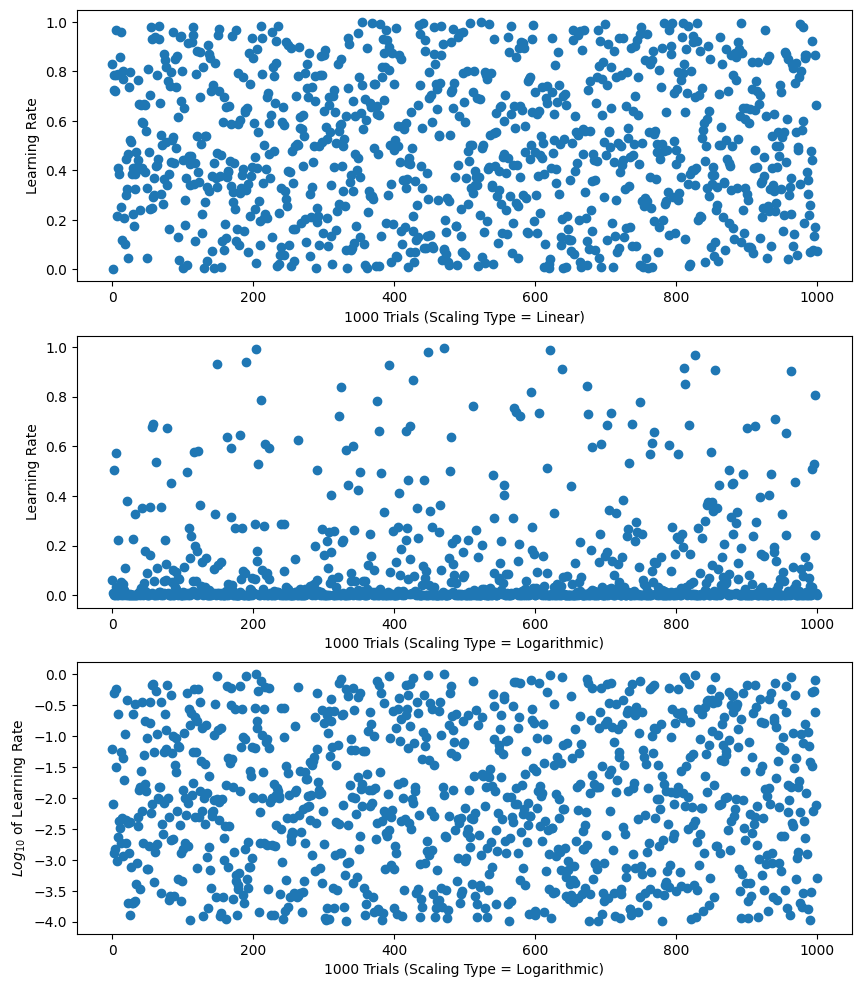

In [90]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
plt.subplot(3, 1, 1)
plt.scatter(range(1000), df_optuna_linear['params_learning_rate'])
plt.xlabel('1000 Trials (Scaling Type = Linear)')
plt.ylabel('Learning Rate')
plt.subplot(3, 1, 2)
plt.scatter(range(1000), df_optuna_logarithmic['params_learning_rate'])
plt.xlabel('1000 Trials (Scaling Type = Logarithmic)')
plt.ylabel('Learning Rate')
plt.subplot(3, 1, 3)
plt.scatter(range(1000), np.log10(df_optuna_logarithmic['params_learning_rate']))
plt.xlabel('1000 Trials (Scaling Type = Logarithmic)')
plt.ylabel('$Log_{10}$ of Learning Rate')